Sandra Rojas Zegarrundo
GU3030768

1. Objetivo
Utilizar a base de dados Penguins da biblioteca seaborn para realizar uma comparação entre dos seguintes classificadores:

Árvore de Decisão,
Floresta Aleatória e
Métodos de conjuntos:
Bagging,
Boosting e
Stacking.
2. Variáveis
Variável Dependente (Alvo): Espécie

Variáveis Independentes: Todas as outras variáveis do conjunto de dados.

3. Tarefas
Carregar e Explorar os Dados:

Carregar a base de dados Penguins utilizando a biblioteca seaborn.

Realizar uma análise exploratória dos dados, incluindo visualizações gráficas e estatísticas descritivas.

Pré-processamento dos Dados:

Tratar valores ausentes e realizar a codificação das variáveis categóricas.

Normalizar as variáveis independentes.

Divisão dos Dados:

Dividir os dados em conjuntos de treinamento e teste.

Treinamento e Avaliação dos Modelos:

Treinar e avaliar os seguintes classificadores:

Árvore de Decisão

Floresta Aleatória

Bagging

Boosting

Stacking

Métricas de Desempenho:

Calcular e apresentar as seguintes métricas para cada classificador:

Acurácia

Precisão

Recuperação

F1 Score

Comparação dos Resultados:

Comparar os resultados dos diferentes classificadores e discutir as vantagens e desvantagens de cada um.

4. Envio
Enviar o arquivo em extensão .ipynb e .html ou .pdf. Outras extensões de arquivo não serão aceitas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
penguins = sns.load_dataset('penguins')

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [5]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
penguins.nunique()

species                3
island                 3
bill_length_mm       164
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex                    2
dtype: int64

In [7]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [8]:
penguins['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
penguins['sex'].unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
penguins.isnull()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


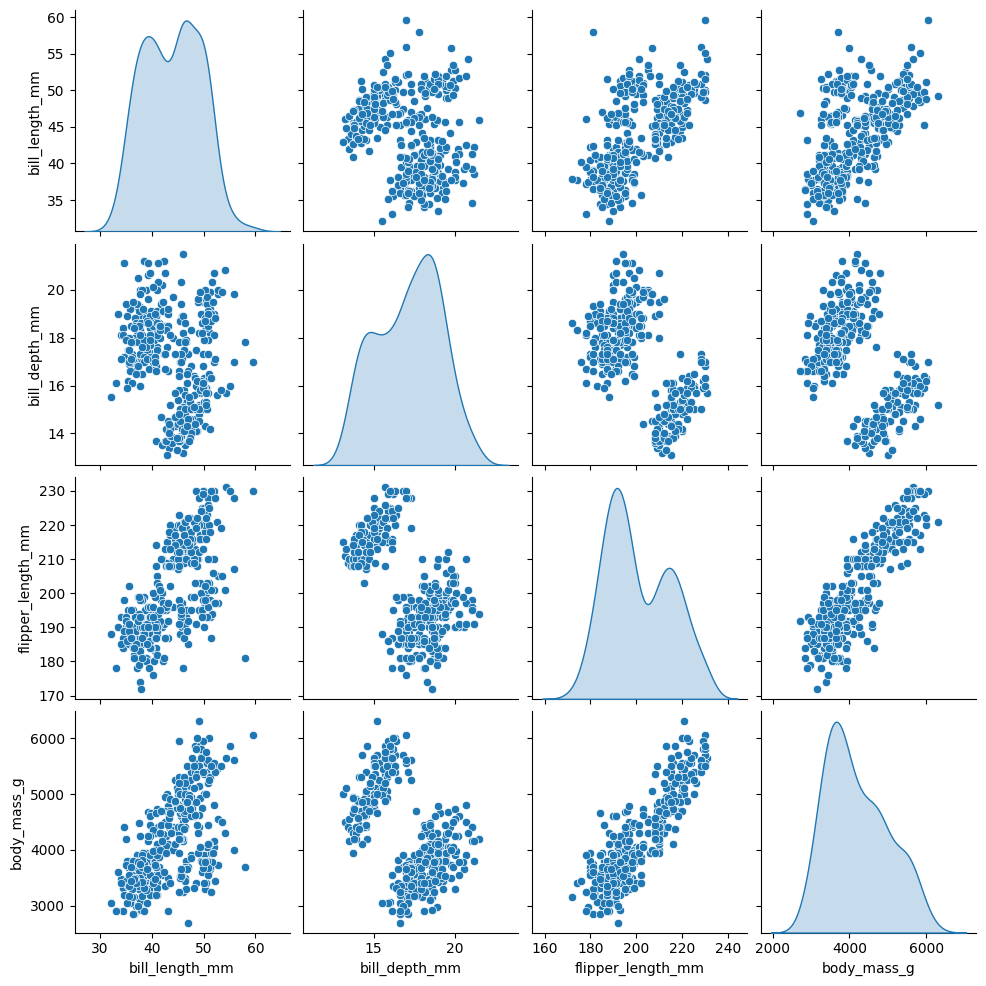

In [11]:
sns.pairplot(penguins, diag_kind='kde')

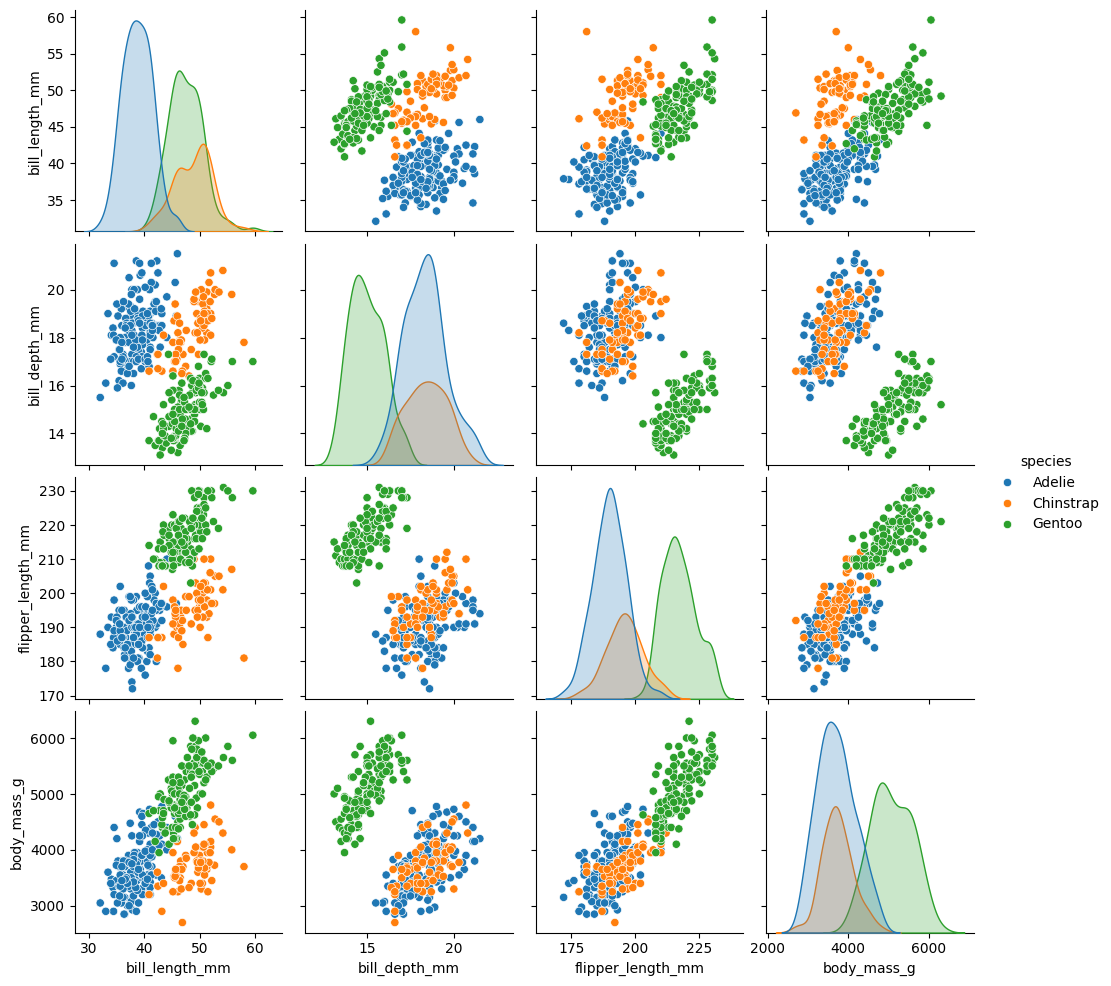

In [12]:
sns.pairplot(penguins, hue='species')

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

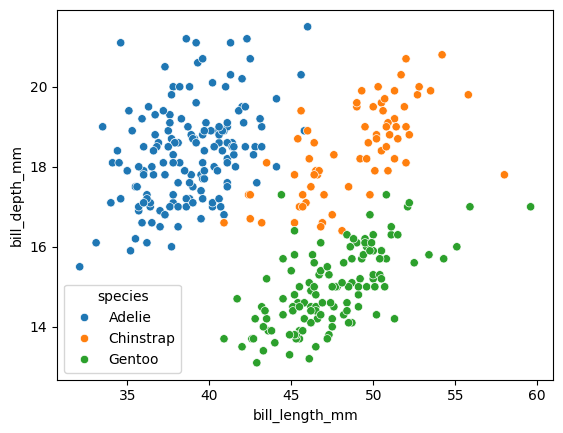

In [13]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

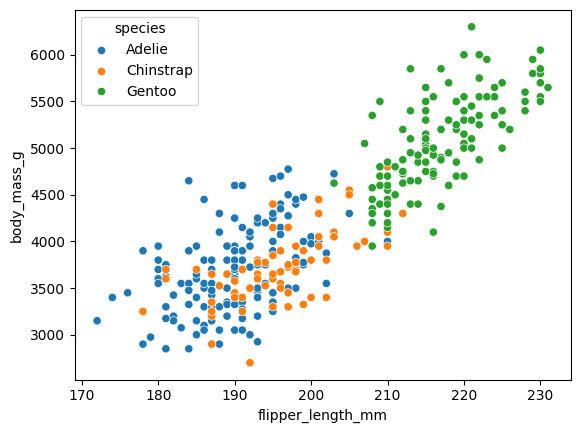

In [14]:
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species')

<Axes: xlabel='species', ylabel='count'>

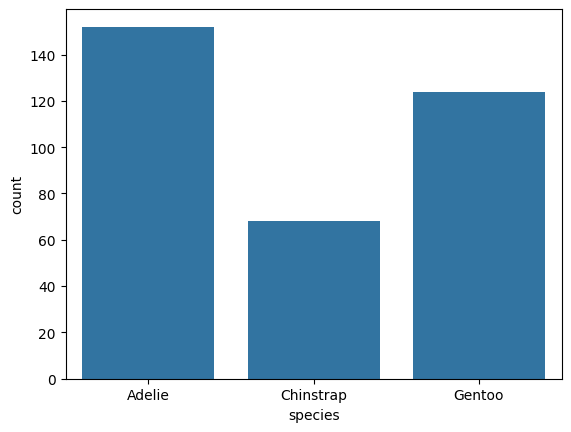

In [15]:
sns.countplot(x='species', data=penguins)

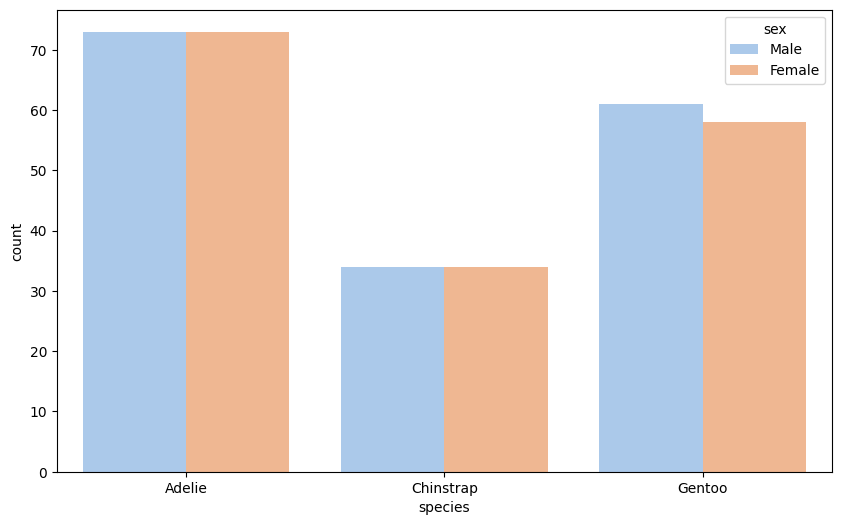

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='species', hue='sex', data=penguins, palette='pastel')
plt.show()

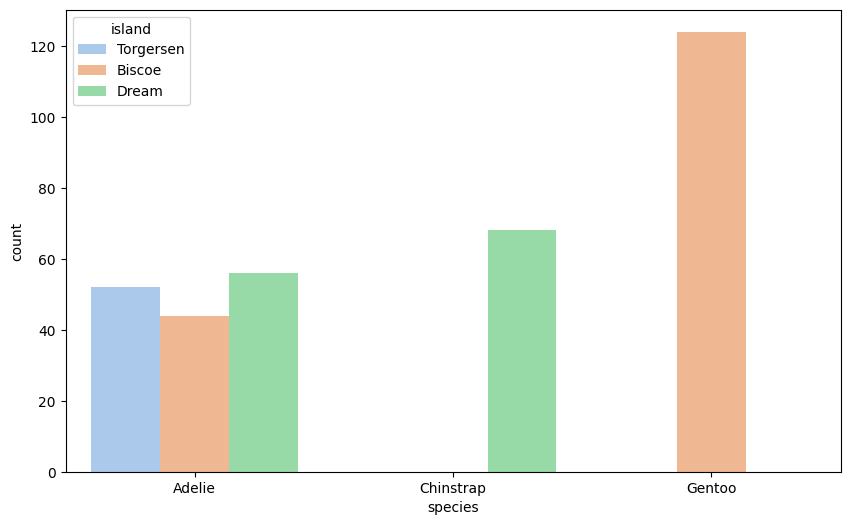

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='species', hue='island', data=penguins, palette='pastel')
plt.show()

In [18]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [19]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Pré-processamento dos Dados:

Tratar valores ausentes e realizar a codificação das variáveis categóricas.

Normalizar as variáveis independentes.

In [20]:
mediana_bill_lenght = penguins['bill_length_mm'].median()
penguins['bill_length_mm'].fillna(mediana_bill_lenght, inplace=True)

C:\Users\Sandra\AppData\Local\Temp\ipykernel_3544\912116346.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins['bill_length_mm'].fillna(mediana_bill_lenght, inplace=True)


In [21]:
mediana_bill_depth = penguins['bill_depth_mm'].median()
penguins['bill_depth_mm'].fillna(mediana_bill_depth, inplace=True)

C:\Users\Sandra\AppData\Local\Temp\ipykernel_3544\4154295999.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins['bill_depth_mm'].fillna(mediana_bill_depth, inplace=True)


In [22]:
mediana_flipper = penguins['flipper_length_mm'].median()
penguins['flipper_length_mm'].fillna(mediana_flipper, inplace=True)

C:\Users\Sandra\AppData\Local\Temp\ipykernel_3544\562181074.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins['flipper_length_mm'].fillna(mediana_flipper, inplace=True)


In [23]:
mediana_body = penguins['body_mass_g'].median()
penguins['body_mass_g'].fillna(mediana_body, inplace=True)

C:\Users\Sandra\AppData\Local\Temp\ipykernel_3544\3996465314.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins['body_mass_g'].fillna(mediana_body, inplace=True)


In [24]:
penguins['sex'] = penguins.groupby('species')['sex'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else None))

In [25]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [26]:
penguins2 = pd.get_dummies(penguins, columns=['sex'], dtype = int)

In [27]:
penguins2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Female,sex_Male
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,0,1
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,1,0
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,1,0
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,1,0
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,1,0


In [28]:
penguins_limpo = penguins2.drop(columns=['sex_Male'])

In [29]:
penguins_limpo.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Female
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,1
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,1
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,1


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
penguins_limpo["species"] = le.fit_transform(penguins_limpo["species"])

In [33]:
penguins_limpo['island'] = le.fit_transform(penguins_limpo['island'])

In [34]:
penguins_limpo.describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Female
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,0.662791,43.925000,17.152035,200.892442,4200.872093,0.497093
std,0.893320,0.726194,5.443792,1.969060,14.023826,799.696532,0.500720
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,0.000000,39.275000,15.600000,190.000000,3550.000000,0.000000
50%,1.000000,1.000000,44.450000,17.300000,197.000000,4050.000000,0.000000
75%,2.000000,1.000000,48.500000,18.700000,213.000000,4750.000000,1.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000


In [35]:
penguins_limpo.nunique()

species                3
island                 3
bill_length_mm       165
bill_depth_mm         80
flipper_length_mm     55
body_mass_g           94
sex_Female             2
dtype: int64

In [36]:
penguins_limpo['species'].unique()

array([0, 1, 2])

In [37]:
penguins_limpo['island'].unique()

array([2, 0, 1])

In [38]:
penguins_limpo['sex_Female'].unique()

array([0, 1])

<Axes: >

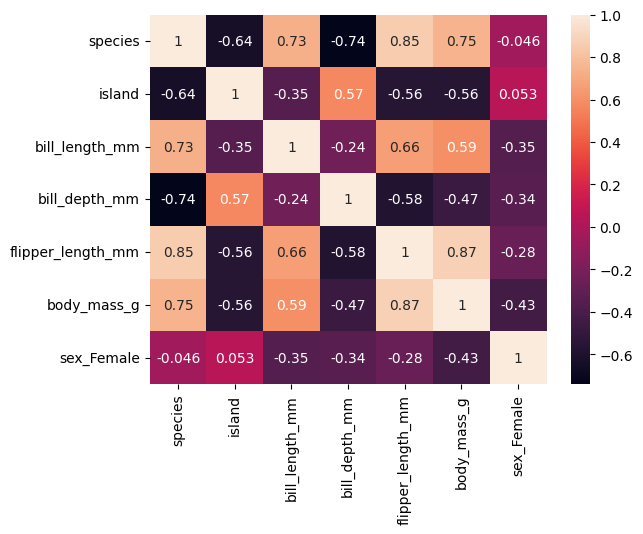

In [39]:
sns.heatmap(penguins_limpo.corr(), annot=True)

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [41]:
x = penguins_limpo.drop('species', axis = 1)
y = penguins_limpo['species']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [43]:
scaler = StandardScaler()

In [44]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Árvore de Decisão**

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [47]:
y_predict = dtree.predict(X_test_scaled)

**Floresta Aleatória**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [50]:
rfc_predict = rfc.predict(X_test_scaled)

**Bagging**

In [51]:
from sklearn.ensemble import BaggingClassifier

In [52]:
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2, max_features=1), n_estimators=10, random_state=42)
bagging_model.fit(X_train_scaled, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2, max_features=1),
                  random_state=42)

In [53]:
bagging_predict = bagging_model.predict(X_test_scaled)

**Boosting**

In [54]:
from sklearn.ensemble import AdaBoostClassifier

In [55]:
shallow_decision_tree = DecisionTreeClassifier(max_depth=1)

In [56]:
ada_clf = AdaBoostClassifier(estimator=shallow_decision_tree, n_estimators=100, random_state=42, algorithm='SAMME')
ada_clf.fit(X_train_scaled, y_train)

C:\Users\Sandra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [57]:
boosting_predict = ada_clf.predict(X_test_scaled)

**Stacking**

In [58]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [59]:
base_learners = [('dtree', DecisionTreeClassifier(max_depth=1)), ('lr', LogisticRegression())]
meta_learners = SVC(probability=True, random_state=42)

In [60]:
stack_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learners, cv=5)
stack_clf.fit(X_train_scaled, y_train)

StackingClassifier(cv=5,
                   estimators=[('dtree', DecisionTreeClassifier(max_depth=1)),
                               ('lr', LogisticRegression())],
                   final_estimator=SVC(probability=True, random_state=42))

In [61]:
stack_predict = stack_clf.predict(X_test_scaled)

In [62]:
print('Árvore de Decisão')
# Acurácia
accuracy = accuracy_score(y_test, y_predict)
print(f'Acurácia: {accuracy:.4f}')

# Precisão
precision = precision_score(y_test, y_predict, average='weighted')
print(f'Precisão: {precision:.4f}')

# Recuperação
recall = recall_score(y_test, y_predict, average='weighted')
print(f'Recuperação: {recall:.4f}')

# F1 Score
f1 = f1_score(y_test, y_predict, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Relatório de classificação
class_report = classification_report(y_test, y_predict)
print('Relatório de Classificação:')
print(class_report)

# Avaliação de Desempenho
conf_matrix = confusion_matrix(y_test, y_predict)
print('Matriz de Confusão:')
print(conf_matrix)

print('\n')

print('Floresta Aleatória')
# Acurácia
accuracy = accuracy_score(y_test, rfc_predict)
print(f'Acurácia: {accuracy:.4f}')

# Precisão
precision = precision_score(y_test, rfc_predict, average='weighted')
print(f'Precisão: {precision:.4f}')

# Recuperação
recall = recall_score(y_test, y_predict, average='weighted')
print(f'Recuperação: {recall:.4f}')

# F1 Score
f1 = f1_score(y_test, rfc_predict, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Relatório de classificação
class_report = classification_report(y_test, rfc_predict)
print('Relatório de Classificação:')
print(class_report)

# Avaliação de Desempenho
conf_matrix = confusion_matrix(y_test, rfc_predict)
print('Matriz de Confusão:')
print(conf_matrix)

print('\n')

print('Bagging')
# Acurácia
accuracy = accuracy_score(y_test, bagging_predict)
print(f'Acurácia: {accuracy:.4f}')

# Precisão
precision = precision_score(y_test, bagging_predict, average='weighted')
print(f'Precisão: {precision:.4f}')

# Recuperação
recall = recall_score(y_test, bagging_predict, average='weighted')
print(f'Recuperação: {recall:.4f}')

# F1 Score
f1 = f1_score(y_test, bagging_predict, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Relatório de classificação
class_report = classification_report(y_test, bagging_predict)
print('Relatório de Classificação:')
print(class_report)

# Avaliação de Desempenho
conf_matrix = confusion_matrix(y_test, bagging_predict)
print('Matriz de Confusão:')
print(conf_matrix)

print('\n')

print('Boosting')
# Acurácia
accuracy = accuracy_score(y_test, boosting_predict)
print(f'Acurácia: {accuracy:.4f}')

# Precisão
precision = precision_score(y_test, boosting_predict, average='weighted')
print(f'Precisão: {precision:.4f}')

# Recuperação
recall = recall_score(y_test, boosting_predict, average='weighted')
print(f'Recuperação: {recall:.4f}')

# F1 Score
f1 = f1_score(y_test, boosting_predict, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Relatório de classificação
class_report = classification_report(y_test, boosting_predict)
print('Relatório de Classificação:')
print(class_report)

# Avaliação de Desempenho
conf_matrix = confusion_matrix(y_test, boosting_predict)
print('Matriz de Confusão:')
print(conf_matrix)

print('\n')

print('Stacking')
# Acurácia
accuracy = accuracy_score(y_test, boosting_predict)
print(f'Acurácia: {accuracy:.4f}')

# Precisão
precision = precision_score(y_test, boosting_predict, average='weighted')
print(f'Precisão: {precision:.4f}')

# Recuperação
recall = recall_score(y_test, boosting_predict, average='weighted')
print(f'Recuperação: {recall:.4f}')

# F1 Score
f1 = f1_score(y_test, boosting_predict, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Relatório de classificação
class_report = classification_report(y_test, boosting_predict)
print('Relatório de Classificação:')
print(class_report)

# Avaliação de Desempenho
conf_matrix = confusion_matrix(y_test, boosting_predict)
print('Matriz de Confusão:')
print(conf_matrix)

Árvore de Decisão
Acurácia: 0.9423
Precisão: 0.9438
Recuperação: 0.9423
F1 Score: 0.9427
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        50
           1       0.86      0.90      0.88        20
           2       0.94      0.97      0.96        34

    accuracy                           0.94       104
   macro avg       0.93      0.94      0.93       104
weighted avg       0.94      0.94      0.94       104

Matriz de Confusão:
[[47  2  1]
 [ 1 18  1]
 [ 0  1 33]]


Floresta Aleatória
Acurácia: 0.9712
Precisão: 0.9719
Recuperação: 0.9423
F1 Score: 0.9714
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.90      0.95      0.93        20
           2       1.00      1.00      1.00        34

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.97       104

C:\Users\Sandra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sandra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Sandra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### 1. Árvore de Decisão
**Vantagens**:
fácil de interpretar e visualizar e pode lidar com dados categóricos.

**Desvantagens**:
pode ser propensa ao overfitting e sensível a pequenas variações nos dados.

### 2. Floresta Aleatória
**Vantagens**:
reduz o risco de overfitting em comparação com uma única árvore de decisão e pode lidar com dados de alta dimensionalidade.

**Desvantagens**:
mais complexo e precisa mais tempo de computação e recursos.

### 3. Bagging
**Vantagens**:
pode melhorar a estabilidade e a precisão de algoritmos, assim como ajuda a evitar overfitting.

**Desvantagens**:
desempenho inferior em comparação com outros métodos, como Floresta Aleatória e Boosting.

### 4. Boosting
**Vantagens**:
geralmente fornece melhor desempenho do que Bagging e Árvores de Decisão.

**Desvantagens**:
mais suscetível ao overfitting se não for bem ajustado e mais complexo.

### 5. Stacking
**Vantagens**:
combina múltiplos modelos e pode capturar diferentes padrões nos dados.

**Desvantagens**:
mais complexo e difícil de implementar, assim como precisa mais tempo de computação e recursos.

### Resumo da Comparação
A Floresta Aleatória apresentou a melhor acurácia (0.9712) e F1 Score (0.9714), seguida pelo Boosting e Stacking (ambos com 0.9615).